# 1. Introduction - Factor Analysis

In this notebook we will be using factor analysis, an exploratory data analysis method used to search influential underlying factors or latent variables from a set of observed variables. It helps in data interpretations by reducing the number of variables. It extracts maximum common variance from all variables and puts them into a common score.

Factor analysis is widely utilized in market research, advertising, psychology, finance, and operation research. Market researchers use factor analysis to identify price-sensitive customers, identify brand features that influence consumer choice, and helps in understanding channel selection criteria for the distribution channel.

# 2. Import Libraries

In [6]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

* FactorAnalyzer is the module for the main exploratory factor analysis class.

# 3. Import Dataset

The dataset we are using for this factor analysis project is derived from a version of the USDA National Nutrient Database, andcontains a wide variety of diferent foods and the nutritional content of those foods, in absolute amounts and based on recommended daily amounts.

Each record is based on 100 grams of the foods recorded.

The columns are mostly self-explanatory. The nutrient columns end with the units, so:

* Nutrient_g is in grams
* Nutrient_mg is in milligrams
* Nutrient_mcg is in micrograms
* Nutrient_USRDA is in percentage of US Recommended Daily Allows (e.g. 0.50 is 50%)

In [113]:
df = pd.read_csv(r"https://query.data.world/s/h2k7zomlcng2ywsusju2pdylvxwwpo")

# 4. Explore the Dataset

In [42]:
df.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


* The dataset has 45 different columns and 8618 different rows.


* Note: USRDA columns do not exist for nutrients Iron and Manganese, as the creator of the dataset determined that the variance of recommended daily amounts for each of these nutrients varied too significantly by age and sex. They also do not exist for the non-vitamins/nutrients like energy_kcal, protein_g, fat_g, carb_g, fiber_g, and sugar_g, likely for reasons similar to the one in the preceding sentence.


* Note: Some of the variables do not have data in the full 8218 rows, specifically the "Name" columns. Out of the three "Name" columns, MfgName had the highest amount of non-null values, which represents only 18% of the rows. This means for each of these variables, at least 82% of data is null or missing. Considering these columns are not relevant, as they are just providing monikers of the foods which we derive the nutritional values from, in addition to the variables having far too much data missing, we will delete the variables.

In [114]:
df_new = df
df_new.drop(['CommonName', 'MfgName', 'ScientificName'],axis=1,inplace=True)

In [115]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   Energy_kcal       8618 non-null   float64
 5   Protein_g         8618 non-null   float64
 6   Fat_g             8618 non-null   float64
 7   Carb_g            8618 non-null   float64
 8   Sugar_g           8618 non-null   float64
 9   Fiber_g           8618 non-null   float64
 10  VitA_mcg          8618 non-null   float64
 11  VitB6_mg          8618 non-null   float64
 12  VitB12_mcg        8618 non-null   float64
 13  VitC_mg           8618 non-null   float64
 14  VitE_mg           8618 non-null   float64
 15  Folate_mcg        8618 non-null   float64
 16  Niacin_mg         8618 non-null   float64


* "Names" columns deleted...all columns have no null values.

In [116]:
df_new.head()

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",876.0,0.28,99.48,0.00,0.00,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",353.0,21.40,28.74,2.34,0.50,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",371.0,23.24,29.68,2.79,0.51,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


* There are also identifiers in the dataset which are not variables which we need to study. Additionally, there are FoodGroup, ShortDescrip, and Descrip variables; we will remove these because they are not numerical and would likely have to be made into dummy variables, which is not feasible as the desired data should be continuous.


* Let's see the amount of unique values for each variable, while we are here...

In [117]:
df_new.nunique()

ID                  8618
FoodGroup             25
ShortDescrip        8614
Descrip             8618
Energy_kcal          666
Protein_g           2642
Fat_g               2405
Carb_g              3199
Sugar_g             1851
Fiber_g              253
VitA_mcg             562
VitB6_mg             991
VitB12_mcg           698
VitC_mg              564
VitE_mg              548
Folate_mcg           436
Niacin_mg           3735
Riboflavin_mg        830
Thiamin_mg           906
Calcium_mg           554
Copper_mcg           803
Iron_mg              948
Magnesium_mg         309
Manganese_mg        1230
Phosphorus_mg        641
Selenium_mcg         643
Zinc_mg              936
VitA_USRDA           562
VitB6_USRDA          991
VitB12_USRDA         698
VitC_USRDA           564
VitE_USRDA           548
Folate_USRDA         436
Niacin_USRDA        3735
Riboflavin_USRDA     830
Thiamin_USRDA        906
Calcium_USRDA        554
Copper_USRDA         803
Magnesium_USRDA      309
Phosphorus_USRDA     641


* ID is an identifier, and the ShortDescrip/Descrip columns are no better than identifiers; also, we simply do not need foodgroup --- testing the nutrients, etc will suffice.

In [118]:
df_new.drop(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip'],axis=1,inplace=True)

In [119]:
df_new.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


* Non-numerical columns deleted...all columns have no null values.

In [223]:
df_new.describe()

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
count,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,...,8.618000e+03,8.618000e+03,8618.000000,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03
mean,-1.401628e-17,4.946921e-18,4.658350e-17,-1.896320e-17,-1.484076e-17,1.030609e-17,1.648974e-18,1.319179e-17,8.244868e-18,-2.473460e-18,...,2.226114e-17,2.391012e-17,0.000000,-8.244868e-19,-6.595895e-18,-1.030609e-17,4.122434e-18,-1.484076e-17,-9.069355e-18,2.803255e-17
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,...,1.000058e+00,1.000058e+00,1.000058,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-1.092316e+00,-6.710831e-01,-8.010694e-01,-4.823251e-01,-4.690575e-01,-1.205784e-01,-5.523961e-01,-2.836951e-01,-1.376425e-01,-2.266493e-01,...,-5.273895e-01,-4.048643e-01,-0.364592,-3.113473e-01,-4.709172e-01,-5.840575e-01,-7.902770e-02,-7.680973e-01,-4.459042e-01,-5.867199e-01
25%,-8.581924e-01,-6.085257e-01,-7.996008e-01,-4.823251e-01,-4.690575e-01,-1.205784e-01,-4.808312e-01,-2.836951e-01,-1.376425e-01,-2.266493e-01,...,-4.251341e-01,-3.469871e-01,-0.319894,-2.570997e-01,-3.783672e-01,-4.056937e-01,-7.902770e-02,-5.859044e-01,-4.423695e-01,-5.182271e-01
50%,-3.070064e-01,-3.411205e-01,-4.726609e-01,-4.551218e-01,-3.995071e-01,-1.186536e-01,-3.016577e-01,-2.651720e-01,-1.376425e-01,-1.980690e-01,...,-1.939479e-01,-2.553482e-01,-0.270230,-1.684954e-01,-2.386691e-01,-2.273300e-01,-7.558109e-02,-1.131876e-01,-3.080498e-01,-3.350833e-01
75%,8.012898e-01,2.050355e-01,4.068277e-01,-9.265674e-02,8.734553e-02,-9.363172e-02,1.893718e-01,1.672638e-02,-9.422425e-02,-1.097299e-01,...,5.057598e-02,2.535613e-02,-0.056674,-4.960282e-02,-2.039081e-02,-6.680259e-02,-4.424819e-02,2.955154e-01,3.069932e-01,2.173259e-01
max,7.279266e+00,5.631928e+00,2.870350e+00,6.855204e+00,1.784588e+01,3.837467e+01,2.452145e+01,2.261317e+01,4.154392e+01,3.859060e+01,...,3.837413e+01,4.469111e+01,36.208180,2.690284e+01,2.111244e+01,1.334615e+01,5.130692e+01,4.806945e+01,6.731487e+01,2.649771e+01


* As stated above, the USRDA variables do not include multiple nutrients due to the extreme variance of recommended daily amounts for the nutrients between men and women, which render the USRDA version obsolete; but even in the cases the dataset presents, it must be the case that there is some bias in USRDA variables based on difference between what a man and what a woman should have as daily intake. In addition, these USRDA variables, with whatever their individual scale is (based on RDA chosen for the nutrient) are assumed to be directly proportional with the mg and mcg versions of the nutrients; therefore, we will choose to remove the USRDA variables at this point.

In [125]:
df_new.drop(df_new.filter(regex='USRDA').columns, axis=1, inplace=True)

In [126]:
df_new.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,2.896234,-1.011747,4.441289,-0.798867,-0.477914,-0.469058,0.757113,-0.546128,-0.244334,-0.137643,...,-0.451809,-0.395218,-0.245398,-0.311347,-0.467425,-0.548385,-0.079028,-0.649918,-0.410557,-0.559918
1,2.896234,-1.011747,4.441289,-0.798867,-0.477914,-0.469058,0.757113,-0.546128,-0.253595,-0.137643,...,-0.451809,-0.395218,-0.245398,-0.282415,-0.442978,-0.548385,-0.078401,-0.654842,-0.410557,-0.571830
2,3.834956,-1.065776,5.599153,-0.801069,-0.482325,-0.469058,0.957289,-0.550307,-0.281380,-0.137643,...,-0.516275,-0.402935,-0.344726,-0.309539,-0.470917,-0.584057,-0.079028,-0.753325,-0.445904,-0.583742
3,0.747208,0.936124,1.140402,-0.715158,-0.445564,-0.469058,0.133490,-0.205541,-0.001218,-0.137643,...,0.321775,-0.348916,2.257682,-0.239017,-0.416784,-0.173821,-0.077618,1.137542,0.066632,0.205414
4,0.853478,1.110532,1.199651,-0.698637,-0.444829,-0.469058,0.254109,-0.416579,0.008044,-0.137643,...,0.252864,-0.377855,2.982780,-0.267949,-0.395829,-0.155984,-0.077148,1.452687,0.066632,0.187546


# 5. Standardize the data

Though it is unnecessary to scale the data due to the fact factor analysis is based on correlations between variables (which is standardized covariances), I still felt comfortable standardizing the different units of value, at the very least to get a more accurate view of outliers.

In [127]:
from sklearn.preprocessing import StandardScaler

# Scale selected columns by index
df_new.iloc[:, 0:] = StandardScaler().fit_transform(df_new.iloc[:, 0:])

df_new.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,2.896234,-1.011747,4.441289,-0.798867,-0.477914,-0.469058,0.757113,-0.546128,-0.244334,-0.137643,...,-0.451809,-0.395218,-0.245398,-0.311347,-0.467425,-0.548385,-0.079028,-0.649918,-0.410557,-0.559918
1,2.896234,-1.011747,4.441289,-0.798867,-0.477914,-0.469058,0.757113,-0.546128,-0.253595,-0.137643,...,-0.451809,-0.395218,-0.245398,-0.282415,-0.442978,-0.548385,-0.078401,-0.654842,-0.410557,-0.571830
2,3.834956,-1.065776,5.599153,-0.801069,-0.482325,-0.469058,0.957289,-0.550307,-0.281380,-0.137643,...,-0.516275,-0.402935,-0.344726,-0.309539,-0.470917,-0.584057,-0.079028,-0.753325,-0.445904,-0.583742
3,0.747208,0.936124,1.140402,-0.715158,-0.445564,-0.469058,0.133490,-0.205541,-0.001218,-0.137643,...,0.321775,-0.348916,2.257682,-0.239017,-0.416784,-0.173821,-0.077618,1.137542,0.066632,0.205414
4,0.853478,1.110532,1.199651,-0.698637,-0.444829,-0.469058,0.254109,-0.416579,0.008044,-0.137643,...,0.252864,-0.377855,2.982780,-0.267949,-0.395829,-0.155984,-0.077148,1.452687,0.066632,0.187546


# 6. Assumptions

Factor analysis deals with the following assumptions:


1. There are no outliers in the data.


2. The sample size of the data should be greater than the factor.


3. There should not be perfect multicollinearity between any variables.


4. There should not be homoscedasticity between variables.


Additionally, the method assumes linearity, which does not need testing due to the methods transformation of non-linear variables to linear; and intervality, which also does not need be tested. 

Below, we will test each assumption the numbered assumptions to see if our dataset meets the criteria.

#### 6A. Outliers

The ideal circumstance is that our data does not include outliers; let's take a look.

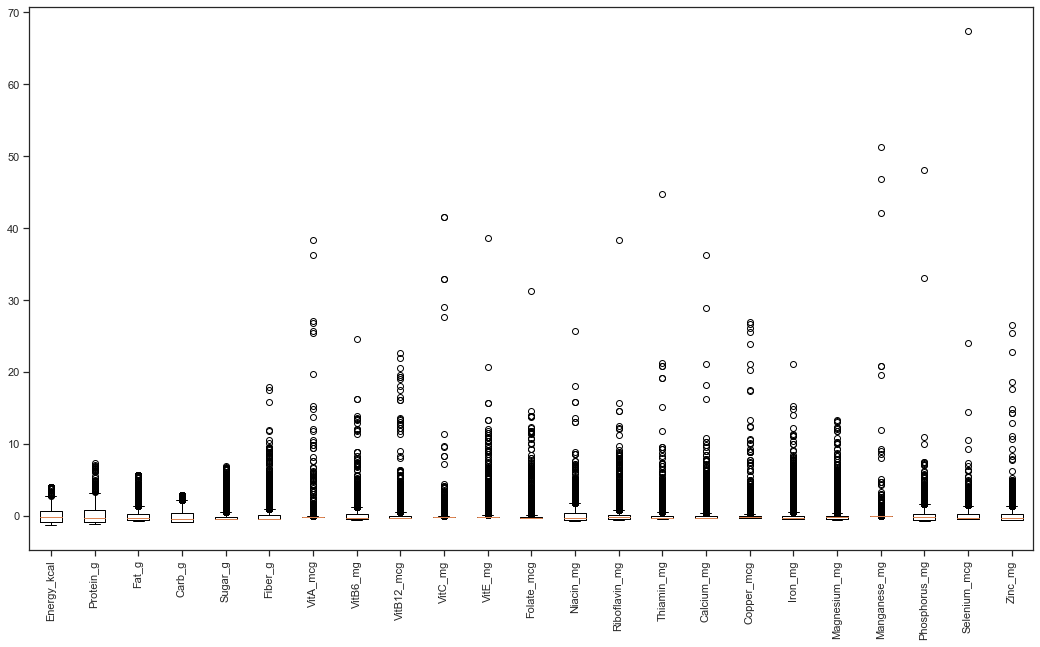

In [128]:
import matplotlib.pyplot as plt

# Multiple box plots on one Axes
fig, ax = plt.subplots(figsize=(18,10))
ax.boxplot(df_new)

labels = [col for col in df_new.columns]
ax.set_xticklabels(labels)
plt.xticks(rotation=90)

plt.show()

* Unfortunately, it seems like each variable still included has a significant amount of outliers; ironically, it seems some of the vitamins and nutritional variables have more outliers than the non-nutritional variables, which would make sense considering foods that we normally eat would be more palatable far exceeding traditional value for nutrients, as opposed to calories or sugar (we could see foods have 300% RDA of Vitamin C, but what food would have 300% daily recommended calories, like 6000?); example = max calories is 902, max vitA_mcg is 30000. But even vitamins with compressed ranges like vitB6_mg (min 0, max 12) have outliers, while energy_kcal (min 0, max 902) appears to barely have outliers.


* There should be differences in foods, as the variability is to be expected; we will not do any changing based on these outliers.

In [224]:
df.loc[df['Selenium_mcg'] > 10]

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
2616,1.315272,-0.374842,-0.801069,-0.482325,-0.469058,-0.020491,0.408768,1.519992,0.046451,-0.226649,...,2.998200,0.359115,-0.300029,0.923689,0.452837,-0.263003,-0.055685,0.413695,10.564779,0.649128
3672,0.265033,3.558238,-0.370045,-0.311018,1.269702,-0.120578,-0.341358,-0.283695,-0.125485,1.241339,...,-0.449586,0.785476,0.430036,2.840436,-0.046584,6.122420,0.112573,2.801899,67.314866,0.622327
3761,0.378777,2.869318,0.016556,-0.160297,0.806033,-0.120578,-0.176288,-0.283695,-0.128959,1.903882,...,0.552961,0.567472,0.161849,2.934465,-0.022137,3.892873,0.163332,1.442838,14.452982,0.801004
8262,1.078305,-0.355933,-0.801069,-0.482325,-0.469058,-0.120578,-0.552396,-0.283695,-0.137643,-0.226649,...,-0.527389,-0.404864,-0.334794,3.106249,1.100686,-0.191657,0.030637,1.181859,24.049773,0.634238


#### 6B. Sample size

The assumption is sample size should be greater than the factor...in doing some research, it is shown that at minimum, the sample size should be between 3 and 20 times the number of variables, and ideally 100 to over 1,000 times the number of variables; let's check out our dataset size.

In [129]:
df_new.shape

(8618, 23)

* There are 8,618 rows and 23 variables, essentially meaning there are 375 rows for each variable, more than sufficient for factor analysis purposes.

#### 6C. Multicollinearity

There should be no muticollinearity, or extremely high correlations between independent variables as if they are too high it becomes difficult to estimate relationships. Let's test this out using variance inflation factor, which measures how much the behavior of an independent variable is influenced (inflated) by its correlation with other independent variables.

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = df_new
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

          feature         VIF
0     Energy_kcal  121.624422
1       Protein_g   10.461761
2           Fat_g   84.380394
3          Carb_g   51.752906
4         Sugar_g    1.810626
5         Fiber_g    2.022048
6        VitA_mcg    2.171714
7        VitB6_mg    2.689373
8      VitB12_mcg    2.419798
9         VitC_mg    1.233494
10        VitE_mg    1.336754
11     Folate_mcg    1.992815
12      Niacin_mg    4.080768
13  Riboflavin_mg    3.738422
14     Thiamin_mg    2.125932
15     Calcium_mg    1.896322
16     Copper_mcg    2.361231
17        Iron_mg    1.967898
18   Magnesium_mg    2.262685
19   Manganese_mg    1.275364
20  Phosphorus_mg    2.297607
21   Selenium_mcg    1.211200
22        Zinc_mg    1.666980


* A rule of thumb is if VIF is over 5, it is high and a variable should possibly be removed; it appears here that there is extreme multicollinearity with calories, protein, sugar and carbs; can we verify this with a correlation table?

In [131]:
df.corr()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
Energy_kcal,1.000000,0.110302,0.806795,0.487096,0.313151,0.197338,0.026329,0.121872,-0.012292,-0.033495,...,0.155830,0.187439,0.123571,0.099513,0.195564,0.255880,0.037621,0.195181,0.056673,0.112766
Protein_g,0.110302,1.000000,0.054715,-0.301974,-0.266170,-0.072777,0.026483,0.228485,0.245423,-0.066456,...,0.202480,0.098360,0.046888,0.158900,0.126375,0.218611,0.039742,0.444608,0.378369,0.416315
Fat_g,0.806795,0.054715,1.000000,-0.054116,-0.001962,-0.028842,0.024379,-0.046950,-0.020786,-0.059993,...,-0.036286,-0.005785,0.015039,0.042765,-0.040408,0.070781,-0.000592,0.066086,0.037559,0.028264
Carb_g,0.487096,-0.301974,-0.054116,1.000000,0.615344,0.458192,0.001871,0.195571,-0.094636,0.076745,...,0.232408,0.281809,0.189106,0.062106,0.350463,0.287207,0.055570,0.073180,-0.114600,-0.012187
Sugar_g,0.313151,-0.266170,-0.001962,0.615344,1.000000,0.115916,0.010143,0.088767,-0.050450,0.064152,...,0.125225,0.097751,0.129540,-0.005837,0.117765,0.041308,0.010871,-0.049784,-0.123708,-0.021991
Fiber_g,0.197338,-0.072777,-0.028842,0.458192,0.115916,1.000000,0.005910,0.242804,-0.052045,0.081852,...,0.157703,0.205211,0.232286,0.185044,0.386710,0.542038,0.101661,0.158422,-0.035897,0.085154
VitA_mcg,0.026329,0.026483,0.024379,0.001871,0.010143,0.005910,1.000000,0.136605,0.581004,0.111279,...,0.325709,0.052921,0.034822,0.569945,0.103475,0.024572,0.369993,0.055814,0.048043,0.070541
VitB6_mg,0.121872,0.228485,-0.046950,0.195571,0.088767,0.242804,0.136605,1.000000,0.264325,0.271305,...,0.581678,0.417011,0.177268,0.116326,0.477905,0.293169,0.066876,0.213395,0.109004,0.447143
VitB12_mcg,-0.012292,0.245423,-0.020786,-0.094636,-0.050450,-0.052045,0.581004,0.264325,1.000000,0.007264,...,0.436182,0.099601,0.011715,0.570642,0.177334,0.004124,0.242112,0.148774,0.215308,0.298136
VitC_mg,-0.033495,-0.066456,-0.059993,0.076745,0.064152,0.081852,0.111279,0.271305,0.007264,1.000000,...,0.225928,0.056987,0.111825,0.025460,0.074417,0.115222,0.017942,0.012000,-0.035218,0.018476


* Here we can see there are strong relationships with calories/fat/carbs, etc, which further suggests multiollinearity. Because it has the biggest VIF, let us start with only removing calories from the dataset.

In [132]:
df_new.drop(['Energy_kcal'], axis=1,inplace=True)

In [133]:
# the independent variables set
X = df_new
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

          feature       VIF
0       Protein_g  2.220731
1           Fat_g  1.198872
2          Carb_g  2.630403
3         Sugar_g  1.810518
4         Fiber_g  1.839847
5        VitA_mcg  2.170905
6        VitB6_mg  2.678003
7      VitB12_mcg  2.417113
8         VitC_mg  1.224969
9         VitE_mg  1.336624
10     Folate_mcg  1.991068
11      Niacin_mg  4.079615
12  Riboflavin_mg  3.737832
13     Thiamin_mg  2.124622
14     Calcium_mg  1.896320
15     Copper_mcg  2.356267
16        Iron_mg  1.966863
17   Magnesium_mg  2.244497
18   Manganese_mg  1.275217
19  Phosphorus_mg  2.288487
20   Selenium_mcg  1.210724
21        Zinc_mg  1.666968


* Now the VIF results are in line for each variable and the multicollinearity assumption can be verified; let us take a look at a heatmap just to check out where we are at.

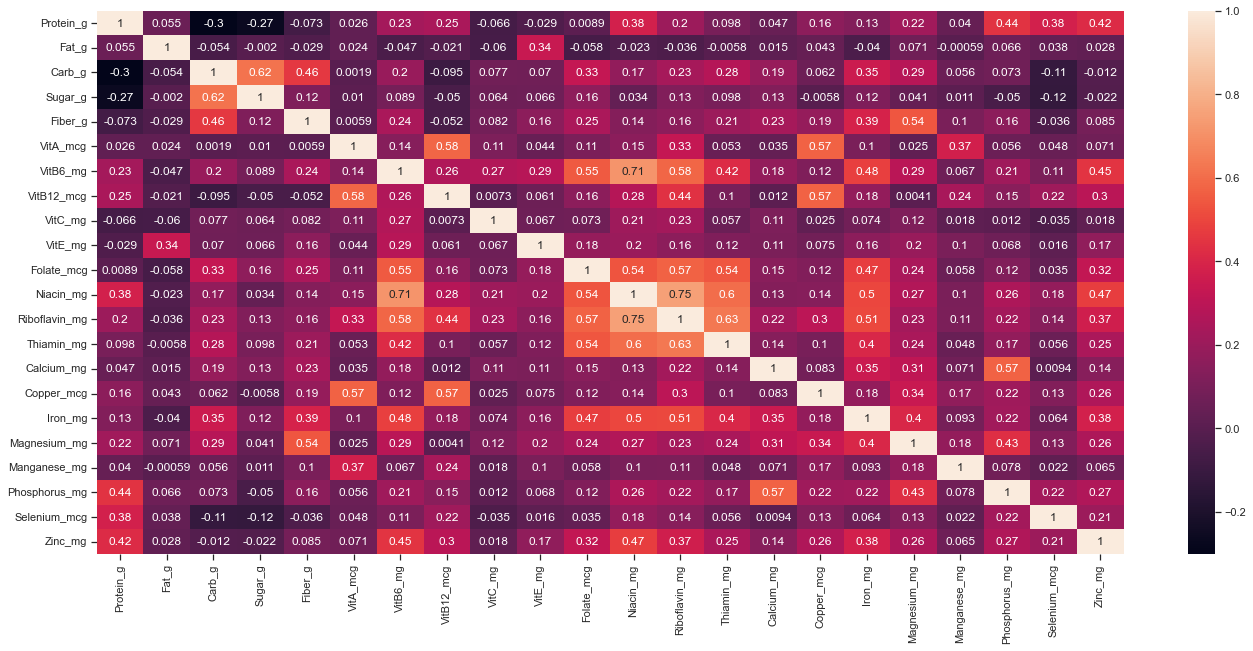

In [134]:
import seaborn as sns
plt.figure(figsize = (23,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

* Still strong relationships occur, which is necessary in a factor analysis problem, but it is manageable, as is suggested by the VIF scores.

#### 6D. Homoscedasticity

The final assumption is that there should not be homoscedasticity between the variables, meaning there need not be equal variances in different groups being compared.  Since factor analysis is a linear function of measured variables, it does not require homoscedasticity between the variables.

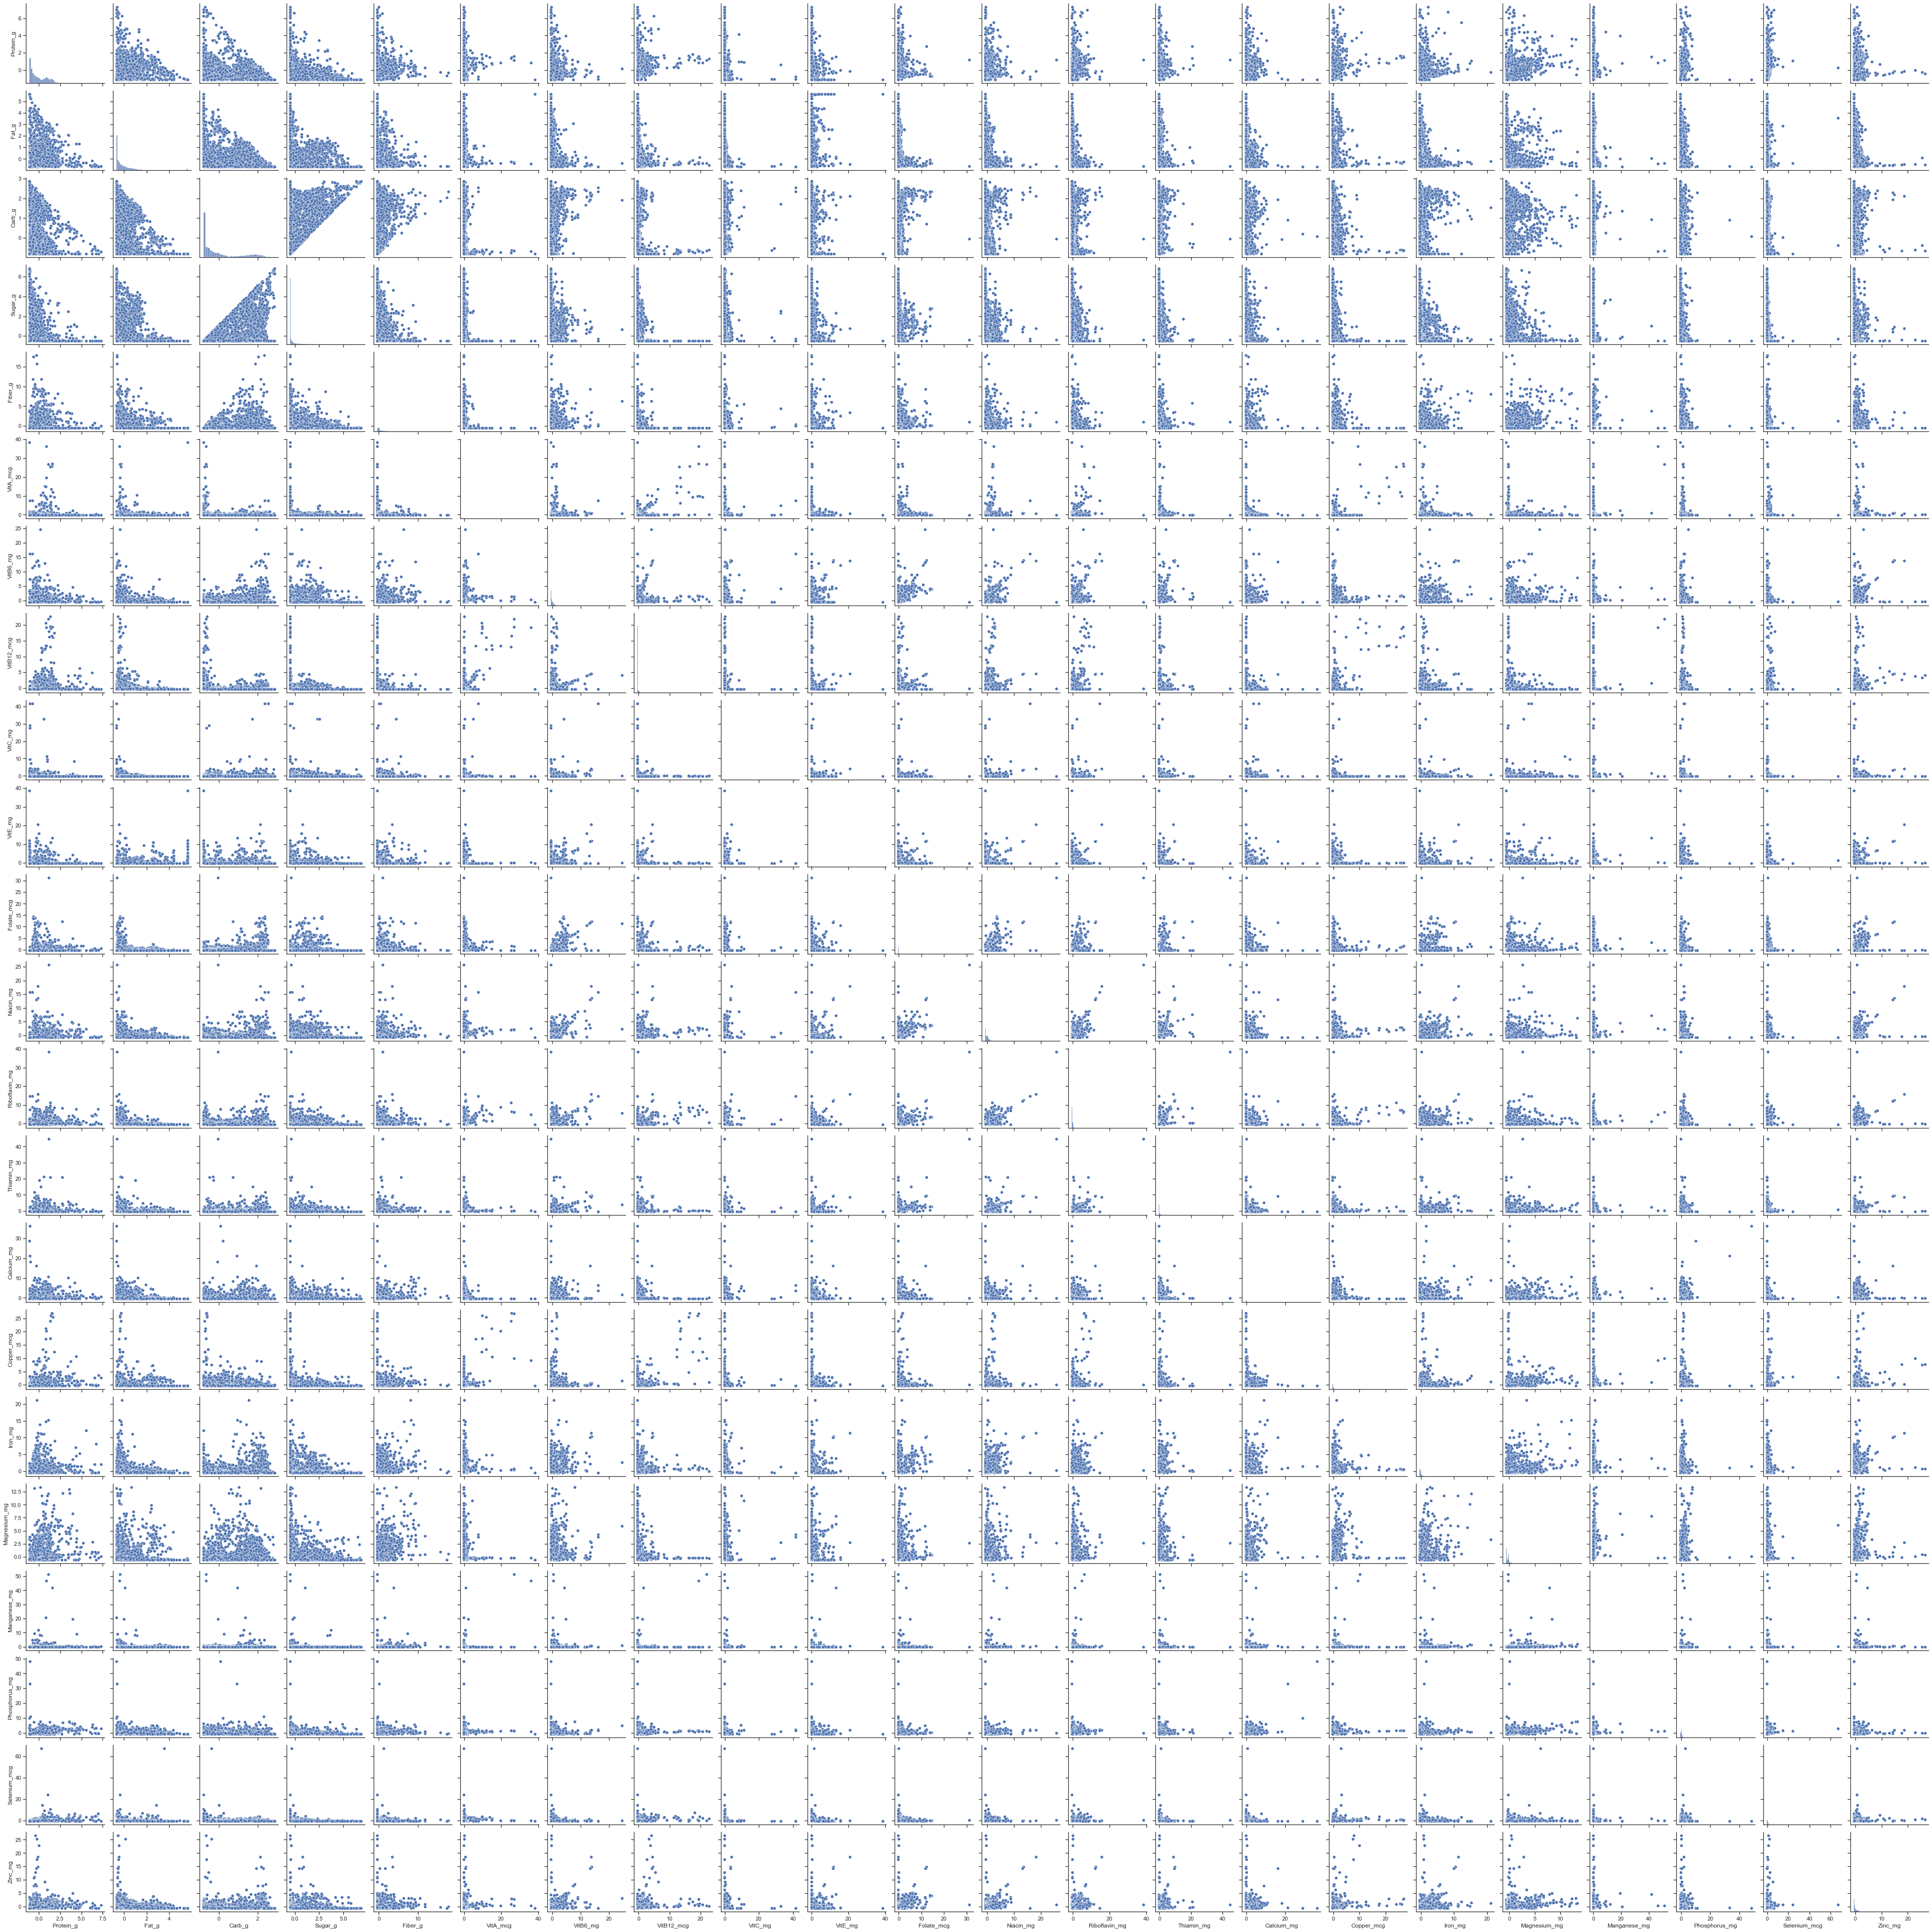

In [66]:
import seaborn as sns

sns.set_theme(style="ticks")
sns.pairplot(df)

* Above we have run a pairplot, which plots pairwise relationships between variables in a dataset, and is relevant because homoscedasticity is sometimes referred to as variables "having the same scatter" (meaning same variance from relative means); as you can see, because we have a lot of variables, it is a lot of individual correlations to draw from and very little overall insights we can take from it; therefore, we will use the Bartlett's test of sphericity, as a test of homoscedaticity.

In [135]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(79105.0206410296, 0.0)

* A good test of homogeneity of variance (homoscedasticity) is the Bartlett's Test of sphericity, which is used to test that variances are equal for all samples. 


* At 21 degrees of freedom with the assumption of alpha = 0.05, the critical value of chi-square is 32.671; as we have a chi-square value of 79105, this suggests there is a significant difference in the variances.


* The p-value is less the 0.05, also confirming there is a significant difference in the variances of the variables, or heteroscedasticity.

In [136]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [137]:
kmo_model

0.7730098738676303

* Another common test of adequacy for factor analysis is the Kaiser-Meyer-Olkin (KMO) test, which is a measure of the proportion of variance among variables that might be common variance. The lower the proportion, the more suited data is to factor analysis. 


* A general rule of thumb for the KMO test is KMO values between 0.8 and 1 indicate the sampling is adequate, while below 0.6 is inadequate; the test statistic for our dataset is 0.77, basically approaching the 0.8 level, which we will assume is fine.


* With the information we have, we can assume factor analysis is feasible on this dataset.

# 7. Choose Number of Factors

We need to choose the number of factors that will properly serve us in factor analysis; we will look for eigenvalues and the Scree plot for this.

In [138]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.3417405 , 2.52319464, 1.88244698, 1.78197692, 1.31538714,
       1.09383595, 1.03681912, 0.91569526, 0.86008538, 0.7930855 ,
       0.68773579, 0.5712873 , 0.5036095 , 0.46279783, 0.40636241,
       0.33718634, 0.32498229, 0.31457066, 0.2531508 , 0.23497162,
       0.20068866, 0.15838937])

* The rule of thumb is that an eigenvalue should be greater than 1 to be useful, as eigenvalues less than 1 signal less variance than any of the original variables in the dataset. Above, there are 7 factors above 1; see the Scree plot below...

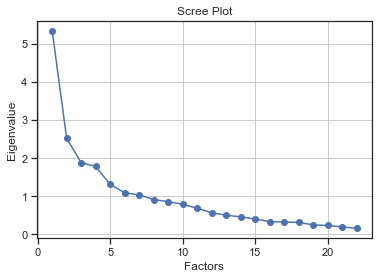

In [139]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

* The Scree plot essentially visualizes the results we got from fitting the data on a FactorAnalyzer above; only 7 variables have eigenvalues above 1, so we will choose only 7 factors moving forward in a factor analysis.

# 8. Perform Factor Analysis

In [140]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
fa.fit(df)

FactorAnalyzer(n_factors=7, rotation='varimax', rotation_kwargs={})

#### 8A. Factor loadings

Factor loadings are measures of how much variables contribute to a factor, using 0.4 as a cutoff loading value; let us see factor loadings below.

<AxesSubplot:xlabel='None'>

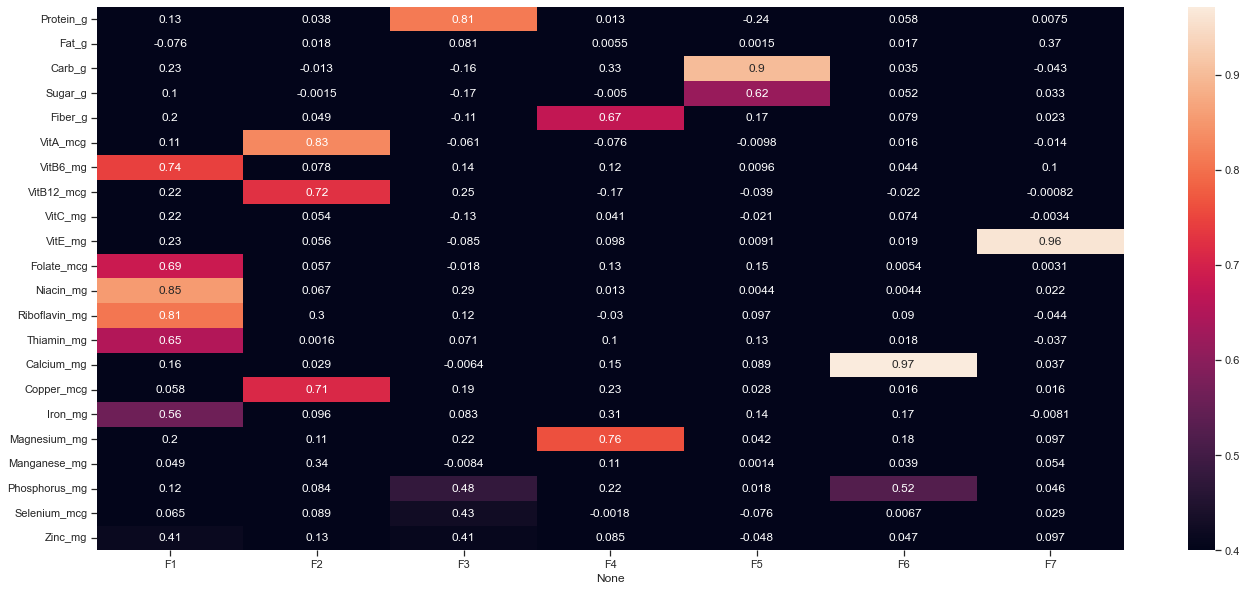

In [153]:
import numpy as np

load = fa.loadings_

load_df = pd.DataFrame(load)

load_df.columns = [['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']]
load_df.index = df.columns

plt.figure(figsize = (23,10))
sns.heatmap(load_df, vmin=0.4, annot=True)

* Factor 1 has high loadings for VitB6_mg, Folate_mcg, Niacin_mg, Riboflavin_mg, Thiamin_mg, and Iron_mg.


* Factor 2 has high loadings for VitA_mcg, VitB12_mcg, and Copper_mcg.


* Factor 3 has high loadings for Protein_g, Phosphorus_mg, Selenium_mg, and Zinc_mg.


* Factor 4 has high loadings for Fiber_g and Magnesium_mg.


* Factor 5 has high loadings for Carb_g and Sugar_g.


* Factor 6 has high loadings for Calcium_mg and Phosphorus_mg.


* Factor 7 has a high loading for VitE_mg.


* Notes:

    * Phosphorus is captured twice in significant factor loadings.
    
    * Fat, Vitamin C, and Manganese are not significant factor loadings for any factor; do not contribute highly to any               factor. This is due to the fact they don't highly correlate enough with the other variables.
    
    * Factors 4, 5, 6, and 7 have 2 or less variables that significantly contribute, while literature suggests a true determing       factor should have 3 or more variables; in the case of having two variables, it is stated that this should only be viewed       as reliable if the 2 contributing variables highly correlate with each other only. Going back to the heatmap, Carb and         Sugar have an 0.62 correlation which is the highest for either; Calcium and Phosphorus have a 0.57 correlation which is         the highest for either; and Fiber and Magnesium have an 0.54 correlation which is the highest for either; so those check       out. Ironically, Vitamin E does not have a significant correlation with any other variable, though it does it several           close to significant correlations (0.34 with Fat, 0.29 with Vitamin B6).

#### 8B. Factor variances

Factor variances illustrate the amount of variance shared among a set of items.

,Variance,Proportional Variance,Cumulative Variance
F1,3.692936,0.167861,0.167861
F2,2.000660,0.090939,0.258800
F3,1.617234,0.073511,0.332310
F4,1.472631,0.066938,0.399248
F5,1.367138,0.062143,0.461391
F6,1.312933,0.059679,0.521070
F7,1.102315,0.050105,0.571175


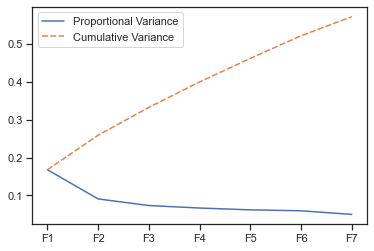

In [219]:
# Get variance of each factors
fv = fa.get_factor_variance()

fv_df = pd.DataFrame(fv)

fv_df.columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']
fv_df.index = ['Variance', 'Proportional Variance', 'Cumulative Variance']

fv_df = fv_df.transpose()

sns.lineplot(data=fv_df[['Proportional Variance', 'Cumulative Variance']])

fv_df

* Cumulative variance for the seven factors represents 57.11% of the total variance within the dataset.

#### 8C. Communalities vs Uniquenesses

Communalities are definitions of common variance ranging between 0 and 1 (values closer to 1 suggest that extracted factors explain more of the variance of an individual item); uniquenesses are variance that is uncommon due to specific variance related to the variable itself, or errors of measurement (is 1 - communalities).

In [180]:
comms = fa.get_communalities()

comms_df = pd.DataFrame(comms_1)

comms_df.columns = ['Communalities']
comms_df.index = df_new.columns

#comms_df

In [181]:
uniqs = fa.get_uniquenesses()

uniqs_df = pd.DataFrame(uniqs)

uniqs_df.columns = ['Uniqueness']
uniqs_df.index = df_new.columns

#uniqs_df

In [196]:
df_comm_uniq = pd.concat([comms_df, uniqs_df], axis=1)
#df_comm_uniq

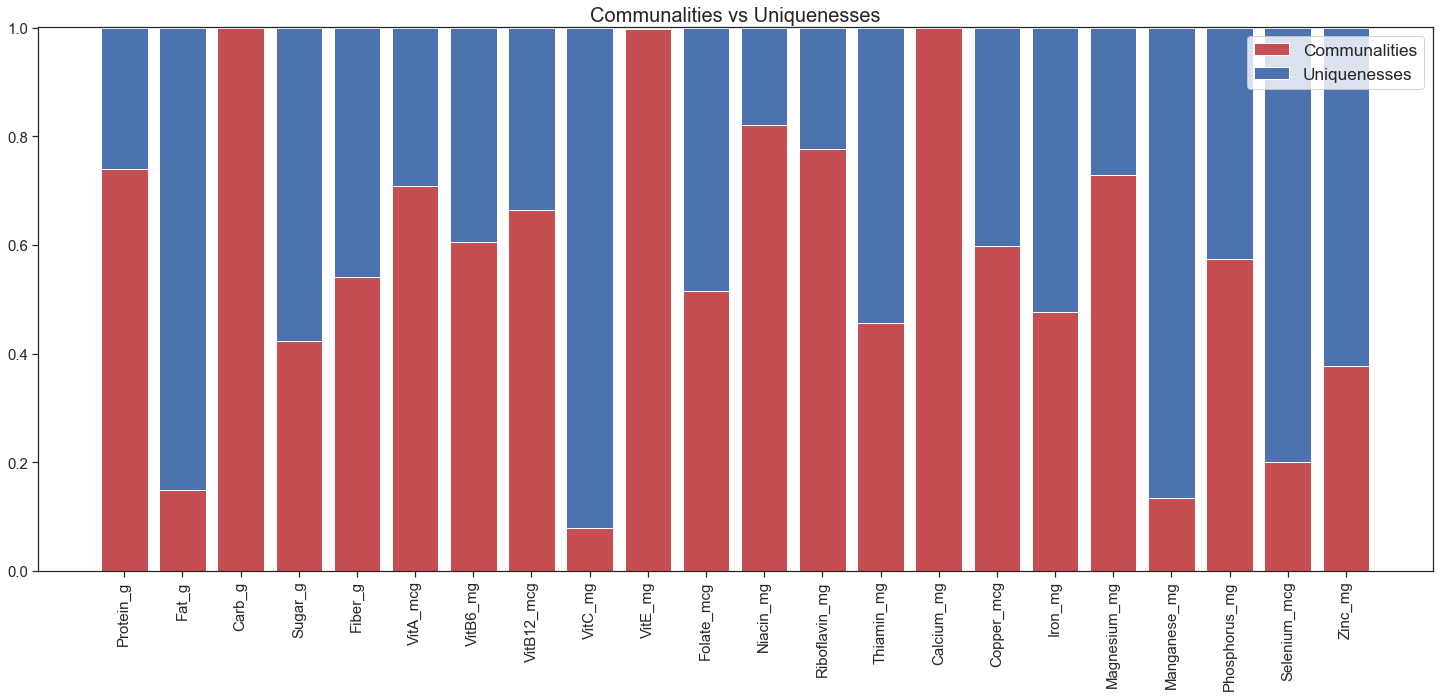

In [201]:
plt.figure(figsize = (25,10))
plt.bar(df_comm_uniq.index, df_comm_uniq['Communalities'], color='r', label='Communalities')
plt.bar(df_comm_uniq.index, df_comm_uniq['Uniqueness'], label='Uniquenesses', bottom=df_comm_uniq['Communalities'])
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.title('Communalities vs Uniquenesses', fontsize=20)
plt.legend(fontsize='x-large')
plt.show()

* Carbs, Vitamin E and Calcium have 100% communality, or common variance; this suggests most of the variance of these variables are explained by the factors (see heatmap of the loadings; each of these variables had a factor which it is at least a 0.9 loading for).


* Fat, Vitamin C, and Manganese (which we saw earlier did not contribute much to any factor loading) had low communality and high uniqueness relating to its variance.


* Most all other variables seem to have a moderate amount of communality and uniqueness in their variance.

# 9. Conclusion

* We utilized factor analysis for the nutritional dataset from the USDA database.


* We removed variables with too many null values (names of food), identifiers (food group/category/description), and USRDA variables (which did not include variables that had significant differences of recommended daily amounts based on gender, and could be determined to have bias in comparison to the raw nutritional data.


* We reviewed assumptions, lettered below:

    A. There are no outliers in the data. (There did appear to be outliers, but this does not seem out of the realm of feasibility, as some foods are simply more nutrient rich than others; would attempt log-transformation as alternative).
    
    B. Sufficient sample size. (There are 375 rows per variable in the dataset, more than sufficient).
    
    C. There need not be perfect multicollinearity between variables. (Used variance inflation factor; ended up getting rid of the calories variable, which had huge multicollinearity especially with the fat, carbs, and sugar variables).
    
    D. There need not be homoscedasticity between variables. (Used Bartlett's Test of Sphericity; chi-square-value and p-value suggested signficant differences between variables, or heteroscedasticity).
    
    
    
* In the end, we analyzed 7 factors, which were able to represent 57% of the total variance (intercorrelations between the variables) within the dataset.